# Credit Card Fraud Detection with Python 3 and Machine Learning

### Online  and other retail services have expanded the payment options which increased credit card fraud incidents. This project will provide some insights on fraud and nonfraudulent transaction. In the Fraud Detection Credit Card data set, class columns catagorizes the transaction as 0 for fraudulent and 1 for not fraudulent. Various packages will be used to display analysis and visualization of the date set.

In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
creditcardfraud = pd.read_csv("creditcard.csv")
print("Shape of the data:")
print(creditcardfraud.shape)
print("\nData Type:")
print(type(creditcardfraud))
print("\nFirst 3 rows:")
print(creditcardfraud.head(3))
creditcardfraud.dtypes

Shape of the data:
(284807, 31)

Data Type:
<class 'pandas.core.frame.DataFrame'>

First 3 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
class       int64
dtype: object

In [3]:
# checking for missing values
print(creditcardfraud.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
ccfraud_new1 = creditcardfraud.copy()                               # Create copy of DataFrame
ccfraud_new1['class'] = ccfraud_new1['class'].astype(float)       # Transform integer to float
ccfraud_new1.head()                                      # Print updated pandas DataFrame

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
# looking for null values
print(ccfraud_new1.isnull().values.any())

False


## Visualization

In [ ]:
# Hypothesis: the fraud transactions are equal to the amount of non fraudulent transaction
# Alternative/Null Hypothesis: the fraud transactions are not equal to the amount of non fraudulent transaction

In [6]:
# determine number of valid and fraud transaction
fraud = ccfraud_new1[ccfraud_new1['class'] == 1]
notfraud = ccfraud_new1[ccfraud_new1['class'] == 0]
outlierFraction = len(fraud)/float(len(notfraud))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(ccfraud_new1[ccfraud_new1['class'] == 1])))
print('Valid Transactions: {}'.format(len(ccfraud_new1[ccfraud_new1['class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [7]:
# summary/descriptive stats on fraud transactions
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
# summary/descriptive stats on valid transactions
notfraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

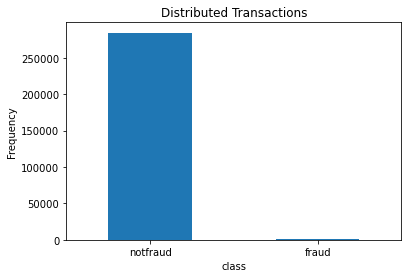

In [9]:
# pie graph
import matplotlib.pyplot as plt
# plot fraud and notfraud

count_classes = pd.value_counts(ccfraud_new1['class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('Distributed Transactions')
plt.xticks(range(2), ['notfraud', 'fraud'])
plt.xlabel('class')
plt.ylabel('Frequency')
plt.show()

In [10]:
# it appears that the frequency of notfraud is greater than fraud transactions

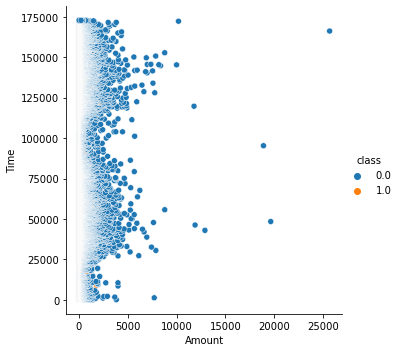

In [23]:
# statistical measures of the data:
notfraud.Amount.describe()
fraud.Amount.describe()

# visualize the data using seaborn:
sns.relplot(x = 'Amount' , y = 'Time' , hue = 'class', data = ccfraud_new1)

## Training and Testing Data Bifurcation

In [26]:
# Compare values of both transactions:
ccfraud_new1.groupby('class').mean()

# Now we will build a sample dataset containing similar distribution of notfraud transaction and fraud transaction:
notfraud_sample = notfraud.sample(n=492) # n is sample size
# Concat notfraud and fraud to create new dataframe which consist equal number of fraud transactions and notfraud transactions to balance the data:
cc_newdata = pd.concat([notfraud_sample, fraud], axis=0)
cc_newdata

# Analyse our new dataset:
cc_newdata['class'].value_counts()

0.0    492
1.0    492
Name: class, dtype: int64

In [27]:
# Using Scikit-learn to split data into training and testing sets after analyzing and visualizing the data
# One for training the model and the other for Testing our trained model’s performance.
# Splitting data into features and targets
x = cc_newdata.drop('class', axis=1)
y = cc_newdata['class']

# splitting the data into training and testing data:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = .33, stratify = y, random_state= 0)
print(x.shape, X_train.shape, X_test.shape)

(984, 30) (659, 30) (325, 30)


In [29]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
# predictions
yPred = rfc.predict(X_test)

In [31]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != Y_test).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(Y_test, yPred)
print("The accuracy is {}".format(acc))

The model used is Random Forest classifier
The accuracy is 0.9107692307692308


In [ ]:
# 91.08% accuracy in our credit card fraud detection

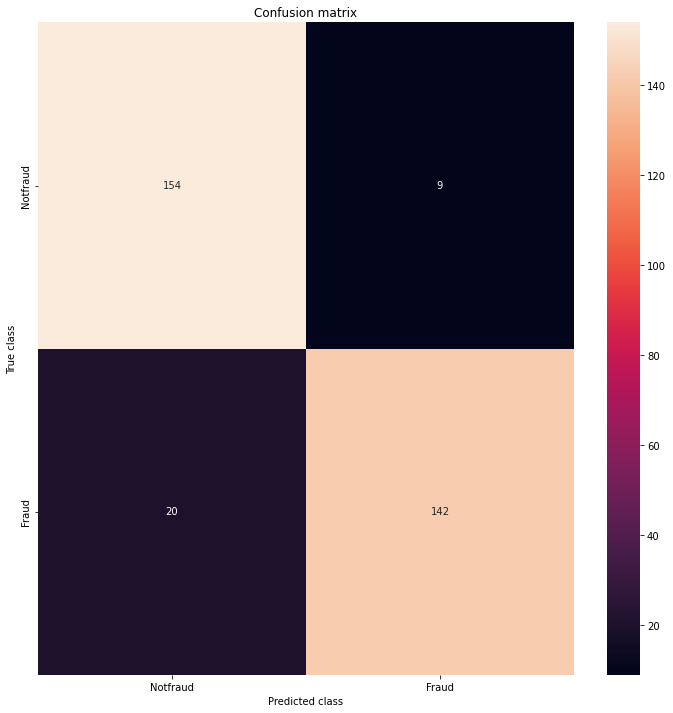

In [32]:
# printing the confusion matrix, used due to the imbalance
LABELS = ['Notfraud', 'Fraud']
conf_matrix = confusion_matrix(Y_test, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
# Here, the first row represents positive and the second row represents negative. 
# So, we have 154 as true positive and 9 are false positive. That says, out of 154+9=163, 
#we have 154 that are successfully
#classified as a notfraud transaction and 9 were falsely classified as notfraud — but they were fraudulent.
# Conclusion: fail to reject the null